# Ford GoBike System Dateset

## by Nishant Sharma


## Introduction
- Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. By the end of 2018, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose

- it became the first regional bicycle sharing system deployed on the West Coast of the United States and also the first regional system in the U.S. that services more than just a single city or adjacent cities. The original system was described as a pilot program and consisted of only 700 bicycles with 70 stations, 34 of which were in San Francisco.

- The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, also available [here](https://s3.amazonaws.com/baywheels-data/index.html).


## Preliminary Wrangling

- This document explores a dataset containing the trip data of the fordgo bike.

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('2017-fordgobike-tripdata.csv')


In [2]:
df.head()  # preview of the data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
# high-level overview of data shape and composition
print(df.shape)

df.info()

(519700, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df.describe() # some description about dataset

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [5]:
# now checking for duplicates
df.duplicated().sum()

0

In [6]:
# here we are checking null values 
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### we found are data neither have any duplicate values nor missing value

In [7]:
df.user_type.value_counts() # for knowledge purpose

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

## Cleaning
Before assessing the data to draw conclusions, there are some quality issues (this dataset is tidy) that need to be cleaned:

- Start/end times are not in the timestamp format
- The following columns are not in object format:
    - start_station_id
    - end_station_id
    - bike_id

In [8]:
df_clean = df.copy() # make a copy of the dataframe

### Define: Converting number of  columns to the appropriate data type:

    - Starting and ending times to the timestamp format
    - User type,bike share for all to category format
    - Bike ID, start station ID, and end station ID to object format

In [9]:
# Changing the format to datetime so data can look tidy

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# Changing the bike_id, start_station_id, and end_station_id to object

df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)

In [11]:
# Changing the user_type to category format

df_clean['user_type'] = df_clean.user_type.astype('category')

### Test

In [12]:
df_clean.info() # for testing reasons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 48.1+ MB


### Define : for the visualisation purpose we are creating start month, day of the week, and hour along with figuring out the trip duration in minutes 

1. Duration in seconds to duration in minutes

2. Start and end time hour

3. Start time month (January - December)

4. Start time weekday
 
5. Start time month (1-12)

## code

## 1

In [13]:
df_clean['duration_min'] = df_clean.duration_sec/60
df_clean['duration_min'] = df_clean.duration_min.astype(int)

## 2

In [14]:

df_clean['start_time_hour'] = df_clean.start_time.dt.hour
df_clean['end_time_hour'] = df_clean.end_time.dt.hour

## 3

In [15]:
df_clean['start_time_month'] = df_clean.start_time.dt.strftime('%B')

## 4

In [16]:

df_clean['start_time_weekday'] = df_clean.start_time.dt.strftime('%a')

## 5

In [17]:

df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)

In [18]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_hour,end_time_hour,start_time_month,start_time_weekday,start_time_month_num
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,16,15,December,Sun,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,15,13,December,Sun,12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,22,11,December,Sun,12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,17,10,December,Sun,12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726,14,2,December,Sun,12


In [19]:
print(df_clean.shape)

(519700, 19)


In [20]:
# checking again for null values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [21]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


#### Define :  total distance traveled using the latitude and longitude in the data set
Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points, i.e. the shortest distance over the earth's surface. Thank you Google for providing a way to figure this out! Reference is listed in the sources at the end of this document.

### code

In [22]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [23]:
# Using the calcuated math on our columns for latitude and longitude
df_clean['distance_in_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'],
                                                                 x['start_station_longitude']),
                                                                (x['end_station_latitude'],
                                                                 x['end_station_longitude'])), axis=1)

In [24]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_hour,end_time_hour,start_time_month,start_time_weekday,start_time_month_num,distance_in_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,16,15,December,Sun,12,0.942931
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,15,13,December,Sun,12,3.069727
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,22,11,December,Sun,12,0.000000


In [25]:
df_clean.shape

(519700, 20)

#### saving dataset into new file which by the way is more cleaned

In [26]:
df_clean.to_csv('2017_bike_cleaned.csv', index = False)

### What is the structure of your dataset?

> The FordGoBike data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions.

> This notebook uses data collection of FY 2017. 


#### The column header descriptions are as follows:

   - Trip Duration (seconds)
   - Start Time and Date
   - End Time and Date
   - Start Station ID
   - Start Station Name
   - Start Station Latitude
   - Start Station Longitude
   - End Station ID
   - End Station Name
   - End Station Latitude
   - End Station Longitude
   - Bike ID
   - User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
   - Start Time Month
   - Start Time Month Number
   - Start Time Day of the Week
   - Start Time Hour
   - Distance (km)
   - Distance (miles)



### What is/are the main feature(s) of interest in your dataset?

>  I am interested in figuring out the factors which influence the trip duration

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. Trip Duration
> 2. User Type 
> 3. Start Date and End Date

In [44]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_min,start_time_hour,end_time_hour,start_time_month,start_time_weekday,start_time_month_num,distance_in_km
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1335,16,15,December,Sun,12,0.942931
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1313,15,13,December,Sun,12,3.069727
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,762,22,11,December,Sun,12,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1036,17,10,December,Sun,12,1.046622
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,726,14,2,December,Sun,12,0.636339


In [48]:

import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

Reached


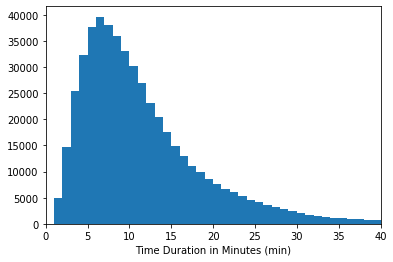

In [53]:
bins = np.arange(0, df_clean['duration_min'].max()+1, 1)
#sb.countplot(data=bike_data,x='duration_hr', color=sb.color_palette()[0])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xlim([0,40])
print("Reached")
plt.xlabel('Time Duration in Minutes (min)')
plt.show()


### 1. looking at the graph we can say it is around 6-7 min.
### This slide indicates the data points of subcriber vis-a-vis customer

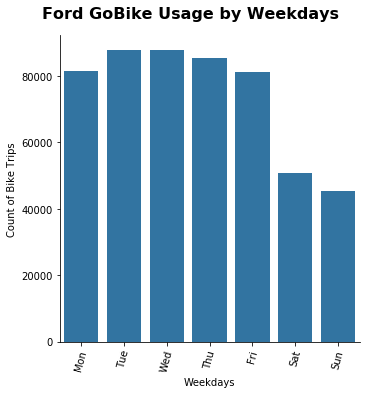

In [55]:
# trip distribution over weekdays of the Ford Go bike system
colour = sb.color_palette()[0]

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

graph_plot = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = colour, order = weekdays)

graph_plot.set_axis_labels('Weekdays', 'Count of Bike Trips')

graph_plot.fig.suptitle('Ford GoBike Usage by Weekdays', y=1.05, fontsize=16, fontweight='bold');

graph_plot.set_xticklabels(rotation=75);

### 2. from the graph , we can say that tuesday and wednesday are most favoured days and saturday and sunday are least favoured


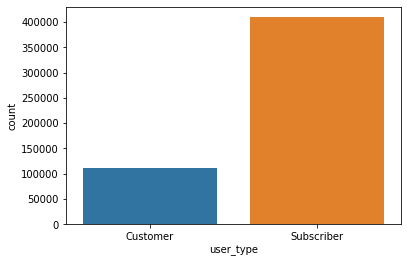

In [56]:
sb.countplot(data=df_clean,x='user_type')

### 3. This obervation shows that subscribers are uses the bike sharing system most.

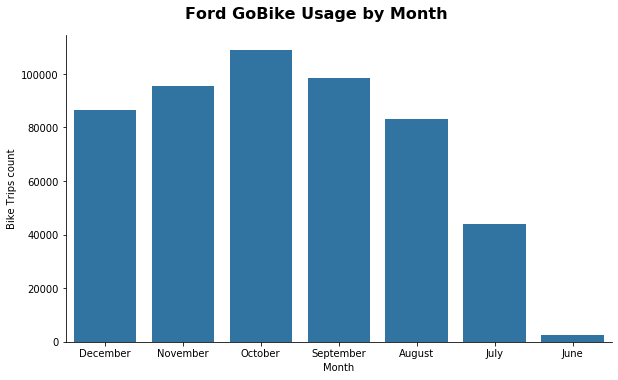

In [62]:
# Monthly usage of the Ford Go Bike system
graph = sb.catplot(data = df_clean, x = 'start_time_month', kind = 'count', color = colour, aspect = 1.7);

graph.set_axis_labels('Month', 'Bike Trips count'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=0);

### 4. clearly we say that october is most populer follwed by november and september and it seems like june is not a good month for bike ride

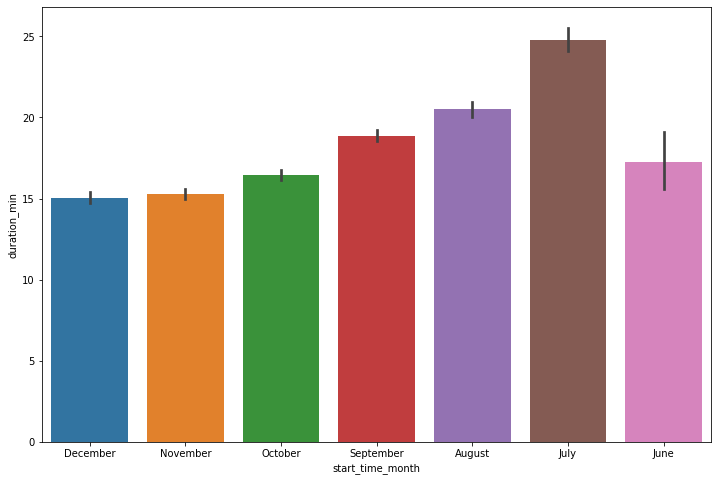

In [69]:
plt.figure(figsize = [12, 8])

sb.barplot(data = df_clean , x = 'start_time_month', y = 'duration_min')
plt.xticks(rotation=0)
plt.show()

### 5. No bike ride is less than of 15 min in any month given 

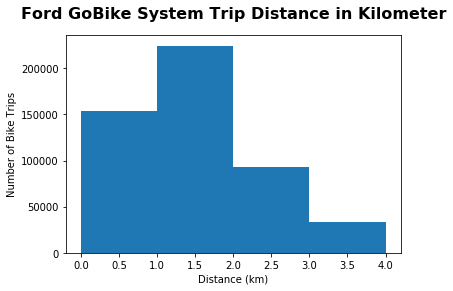

In [70]:
# Distance in miles traveled

bin_edges = np.arange(0, 5, 1)

plt.hist(data = df_clean, x = 'distance_in_km', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Kilometer", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Bike Trips');

In [72]:
df_clean.distance_in_km.describe()

count    519700.000000
mean          1.587077
std           1.010391
min           0.000000
25%           0.899642
50%           1.400244
75%           2.072494
max          68.186787
Name: distance_in_km, dtype: float64

### 6. By the graph and describe function we can analyse that 75% of rides being 2.07 miles or less and most of the rides are being under 3 miles.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> suscribers are the one who are using the bike sharing system the most

> sundays are holiday than also it is least favoured weekday

> Most rides are quick and short, but there is some outliers also



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> The data was already in a good structure but we added some coloumn for increasing area of observations. we also calculate the distance using latitude and longitude using 'haversine' formula

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

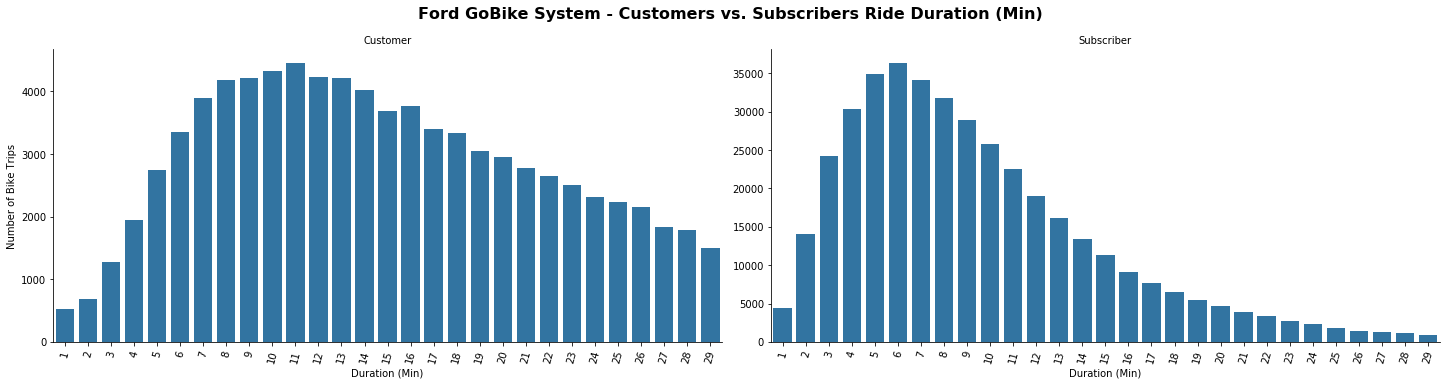

In [82]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df_clean.query('duration_min < 30')

graph_plot = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = colour, height=5, aspect=2);

graph_plot.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph_plot.set_titles('{col_name}')

graph_plot.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph_plot.set_xticklabels(rotation=75);

1.
 
- Customer regularly have longer durations (8 to 18 minutes according to the box plot) as compared to subscribers (5 to 12 minutes according to the box plot). 
- This plot can be explained by the fact that subscribers are local folks who take short trips to work/school rather than longer trips around the Bay Area.

In [77]:
# calculate % of split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean.bike_id.count()
subscriber_proportion = subscriber / df_clean.bike_id.count()

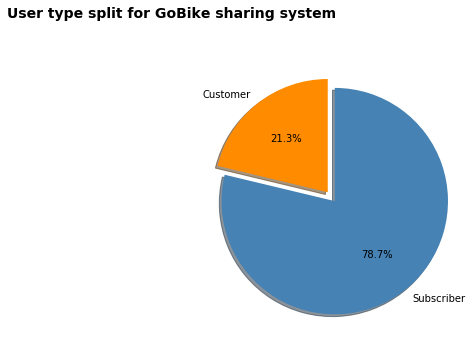

In [81]:
plt.figure(figsize = [10, 5])

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

2. By this we can say that The bike sharing system is mainly used by subscribers (21.3%) than ocassional riders (78.7%)

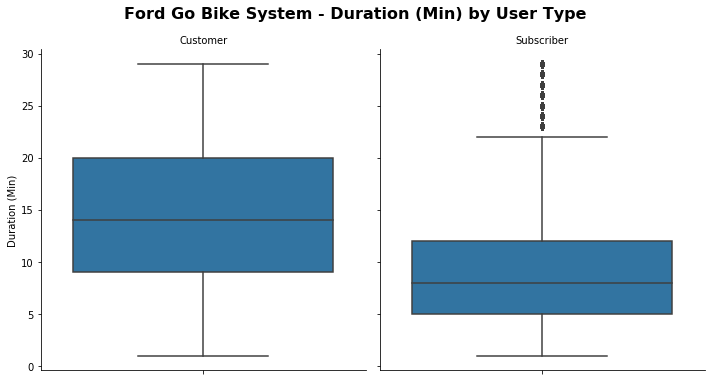

In [83]:
data = df_clean.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = colour)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

3. as we can see there are many outliners who are possing more duration as a subcriber and there are no outliners in custumers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Yes. In the univariate exploration, the number of subscribers who used bikes were more than customers. However, in the bivariate exploration, the avearge time spent by customers were more than subscribers
> Another interesting feature, is there are number of outliners in subscribers
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

## Multivariate Exploration

> I Create plots of three or more variables to investigate our data even further.

####  Between customers and subscribers ,How does the average trip duration vary in weekdays?

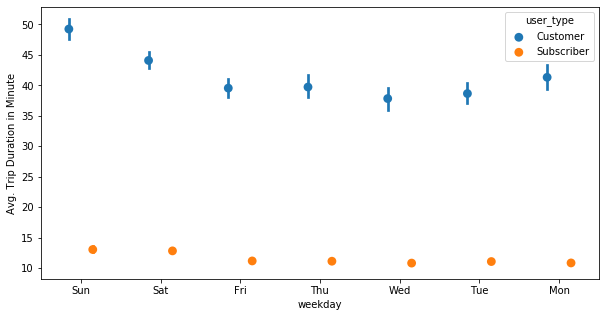

In [108]:
plt.figure(figsize = [10, 5])
sb.pointplot(data=df_clean, x='start_time_weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.ylabel('Avg. Trip Duration in Minute');
plt.xlabel('weekday');


from the above figure we can easily say that customers ride much longer as compared to subscriber on every day of week

<Figure size 432x288 with 0 Axes>

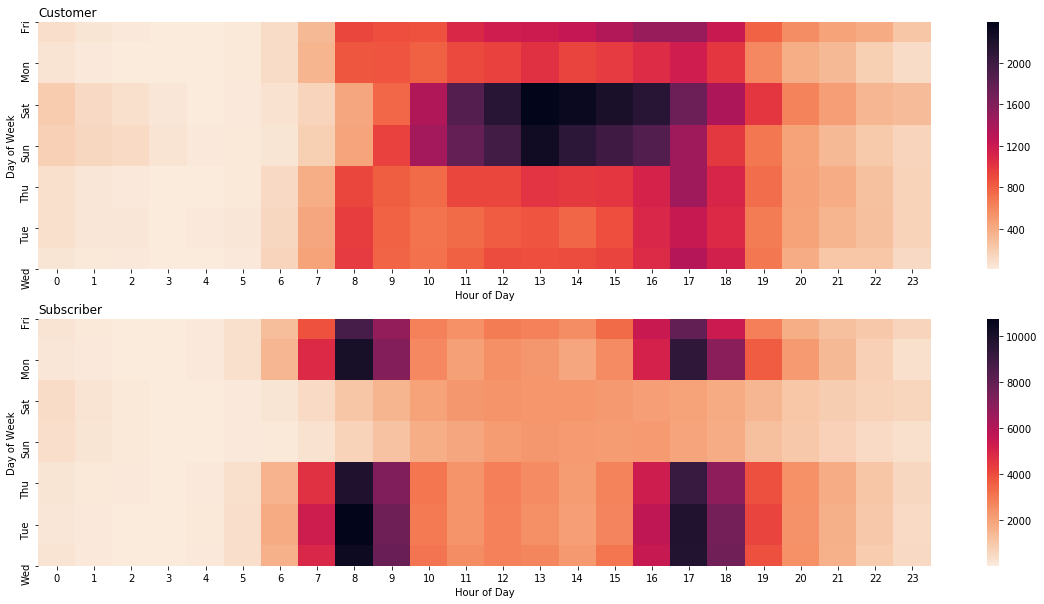

In [111]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.figure(figsize=(20,10))


plt.subplot(2, 1, 2)
subscribers = df_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 1)
customers = df_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


#### For customers and subscribers How does the hourly usage vary during weekdays ?

> The heatmaps shows clearly very different usage pattern/habit between the two type of riders.customers ride a lot on weekends, Subscribers use the system heavily on work days i.e. Monday through Friday , especially in the afternoon. Many trips concentrated around 8-9am and 5-6pm on work days for subscribers when used for work commute, yet customers tend to use more in the late afternoon around 5pm Monday to Friday. Other than usage purpose and habit, it may also have to do with the traffic situation around these rush hours in the area.

### our sources

- [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) documentation
- [Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) used to calculate distances using latitude and longitude
- [FordGoBike Data Set](https://s3.amazonaws.com/baywheels-data/index.html)